In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

#custom
from quantum_layer import QuantumLayer

# unsupervised

In [2]:
import numpy as np
import os

# Define the folder path
features_folder = "./../../features/training-a/umap"

print(f"Loading features from: {features_folder}\n")

# ==========================================
# 1. Load Grayscale Data
# ==========================================
try:
    X_gray_4 = np.load(f"{features_folder}/X_gray_umap_4.npy")
    X_gray_8 = np.load(f"{features_folder}/X_gray_umap_8.npy")
    y_gray   = np.load(f"{features_folder}/y_gray.npy")

    print("✅ Grayscale Data Loaded")
    print(f"  - 4D Shape: {X_gray_4.shape}")
    print(f"  - 8D Shape: {X_gray_8.shape}")
    print(f"  - Labels:   {y_gray.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading Grayscale data: {e}")

# ==========================================
# 2. Load Binary Data
# ==========================================
try:
    X_binary_4 = np.load(f"{features_folder}/X_binary_umap_4.npy")
    X_binary_8 = np.load(f"{features_folder}/X_binary_umap_8.npy")
    y_binary   = np.load(f"{features_folder}/y_binary.npy")

    print("\n✅ Binary Data Loaded")
    print(f"  - 4D Shape: {X_binary_4.shape}")
    print(f"  - 8D Shape: {X_binary_8.shape}")
    print(f"  - Labels:   {y_binary.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading Binary data: {e}")

Loading features from: ./../../features/training-a/umap

✅ Grayscale Data Loaded
  - 4D Shape: (19702, 4)
  - 8D Shape: (19702, 8)
  - Labels:   (19702,)

✅ Binary Data Loaded
  - 4D Shape: (19702, 4)
  - 8D Shape: (19702, 8)
  - Labels:   (19702,)


In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the scaler
scaler = MinMaxScaler()

print("Scaling features to range [0, 1]...\n")

# ==========================================
# 1. Scale Grayscale Data
# ==========================================
# Fit and transform 4D
X_gray_4_scaled = scaler.fit_transform(X_gray_4)
print(f"✅ Scaled Gray 4D. Min: {X_gray_4_scaled.min():.1f}, Max: {X_gray_4_scaled.max():.1f}")

# Fit and transform 8D
X_gray_8_scaled = scaler.fit_transform(X_gray_8)
print(f"✅ Scaled Gray 8D. Min: {X_gray_8_scaled.min():.1f}, Max: {X_gray_8_scaled.max():.1f}")

# ==========================================
# 2. Scale Binary Data
# ==========================================
# Fit and transform 4D
X_binary_4_scaled = scaler.fit_transform(X_binary_4)
print(f"✅ Scaled Binary 4D. Min: {X_binary_4_scaled.min():.1f}, Max: {X_binary_4_scaled.max():.1f}")

# Fit and transform 8D
X_binary_8_scaled = scaler.fit_transform(X_binary_8)
print(f"✅ Scaled Binary 8D. Min: {X_binary_8_scaled.min():.1f}, Max: {X_binary_8_scaled.max():.1f}")

Scaling features to range [0, 1]...

✅ Scaled Gray 4D. Min: 0.0, Max: 1.0
✅ Scaled Gray 8D. Min: 0.0, Max: 1.0
✅ Scaled Binary 4D. Min: 0.0, Max: 1.0
✅ Scaled Binary 8D. Min: 0.0, Max: 1.0


In [4]:
from sklearn.model_selection import train_test_split

print("Splitting data into Training (80%) and Testing (20%) sets...\n")

# ==========================================
# 1. Split Grayscale Data (4D & 8D)
# ==========================================
# --- Gray 4D ---
X_train_g4, X_test_g4, y_train_g4, y_test_g4 = train_test_split(
    X_gray_4_scaled, y_gray, 
    test_size=0.2, random_state=42, stratify=y_gray
)

# --- Gray 8D ---
X_train_g8, X_test_g8, y_train_g8, y_test_g8 = train_test_split(
    X_gray_8_scaled, y_gray, 
    test_size=0.2, random_state=42, stratify=y_gray
)

# ==========================================
# 2. Split Binary Data (4D & 8D)
# ==========================================
# --- Binary 4D ---
X_train_b4, X_test_b4, y_train_b4, y_test_b4 = train_test_split(
    X_binary_4_scaled, y_binary, 
    test_size=0.2, random_state=42, stratify=y_binary
)

# --- Binary 8D ---
X_train_b8, X_test_b8, y_train_b8, y_test_b8 = train_test_split(
    X_binary_8_scaled, y_binary, 
    test_size=0.2, random_state=42, stratify=y_binary
)

# ==========================================
# 3. Validation Output
# ==========================================
print(f"✅ Gray 4D Train shape:   {X_train_g4.shape}")
print(f"✅ Gray 8D Train shape:   {X_train_g8.shape}")
print(f"✅ Binary 4D Train shape: {X_train_b4.shape}")
print(f"✅ Binary 8D Train shape: {X_train_b8.shape}")

Splitting data into Training (80%) and Testing (20%) sets...

✅ Gray 4D Train shape:   (15761, 4)
✅ Gray 8D Train shape:   (15761, 8)
✅ Binary 4D Train shape: (15761, 4)
✅ Binary 8D Train shape: (15761, 8)


In [5]:
import torch

print("Converting data to PyTorch tensors...\n")

# ==========================================
# 1. Grayscale Data (4D & 8D)
# ==========================================
# --- Gray 4D ---
X_train_g4_t = torch.tensor(X_train_g4, dtype=torch.float32)
y_train_g4_t = torch.tensor(y_train_g4, dtype=torch.long)
X_test_g4_t  = torch.tensor(X_test_g4, dtype=torch.float32)
y_test_g4_np = y_test_g4  # Keep as numpy for evaluation

# --- Gray 8D ---
X_train_g8_t = torch.tensor(X_train_g8, dtype=torch.float32)
y_train_g8_t = torch.tensor(y_train_g8, dtype=torch.long)
X_test_g8_t  = torch.tensor(X_test_g8, dtype=torch.float32)
y_test_g8_np = y_test_g8

# ==========================================
# 2. Binary Data (4D & 8D)
# ==========================================
# --- Binary 4D ---
X_train_b4_t = torch.tensor(X_train_b4, dtype=torch.float32)
y_train_b4_t = torch.tensor(y_train_b4, dtype=torch.long)
X_test_b4_t  = torch.tensor(X_test_b4, dtype=torch.float32)
y_test_b4_np = y_test_b4

# --- Binary 8D ---
X_train_b8_t = torch.tensor(X_train_b8, dtype=torch.float32)
y_train_b8_t = torch.tensor(y_train_b8, dtype=torch.long)
X_test_b8_t  = torch.tensor(X_test_b8, dtype=torch.float32)
y_test_b8_np = y_test_b8

# ==========================================
# 3. Validation
# ==========================================
print(f"✅ Gray 4D Tensor:   {X_train_g4_t.shape}, dtype={X_train_g4_t.dtype}")
print(f"✅ Gray 8D Tensor:   {X_train_g8_t.shape}, dtype={X_train_g8_t.dtype}")
print(f"✅ Binary 4D Tensor: {X_train_b4_t.shape}, dtype={X_train_b4_t.dtype}")
print(f"✅ Binary 8D Tensor: {X_train_b8_t.shape}, dtype={X_train_b8_t.dtype}")

Converting data to PyTorch tensors...

✅ Gray 4D Tensor:   torch.Size([15761, 4]), dtype=torch.float32
✅ Gray 8D Tensor:   torch.Size([15761, 8]), dtype=torch.float32
✅ Binary 4D Tensor: torch.Size([15761, 4]), dtype=torch.float32
✅ Binary 8D Tensor: torch.Size([15761, 8]), dtype=torch.float32


In [6]:
import torch.nn as nn
from quantum_layer import QuantumLayer 

# ==========================================
# Initialize Model Dictionaries
# ==========================================
models_gray = {}
models_binary = {}

# We only have data prepared for 4 and 8 dimensions
components_list = [4, 8] 

print("Initializing Hybrid Quantum-Classical Models...\n")

for n in components_list:
    # -------------------- Grayscale Models --------------------
    models_gray[n] = nn.Sequential(
        # Assumes QuantumLayer accepts 'n_qubits' and outputs a tensor of size 'n'
        QuantumLayer(n_qubits=n), 
        nn.Linear(n, 16),         
        nn.ReLU(),
        nn.Linear(16, 10)         
    )

    # -------------------- Binary Models --------------------
    models_binary[n] = nn.Sequential(
        QuantumLayer(n_qubits=n), 
        nn.Linear(n, 16),         
        nn.ReLU(),
        nn.Linear(16, 10)         
    )

    print(f"✅ Created models for n={n}")

# ==========================================
# Verify Structure
# ==========================================
print(f"\nExample Structure (Gray n=4):\n{models_gray[4]}")
print(f"\nExample Structure (Binary n=8):\n{models_binary[8]}")


No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


Initializing Hybrid Quantum-Classical Models...

✅ Created models for n=4
✅ Created models for n=8

Example Structure (Gray n=4):
Sequential(
  (0): QuantumLayer(
    (q_layer): TorchConnector()
  )
  (1): Linear(in_features=4, out_features=16, bias=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
)

Example Structure (Binary n=8):
Sequential(
  (0): QuantumLayer(
    (q_layer): TorchConnector()
  )
  (1): Linear(in_features=8, out_features=16, bias=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
)


In [7]:
# Dictionary to store tensors by component count (n)
# Grayscale
X_train_gray_t_dict = {4: X_train_g4_t, 8: X_train_g8_t}
y_train_gray_t_dict = {4: y_train_g4_t, 8: y_train_g8_t}
X_test_gray_t_dict  = {4: X_test_g4_t,  8: X_test_g8_t}
y_test_gray_np_dict = {4: y_test_g4_np, 8: y_test_g8_np}

# Binary
X_train_binary_t_dict = {4: X_train_b4_t, 8: X_train_b8_t}
y_train_binary_t_dict = {4: y_train_b4_t, 8: y_train_b8_t}
X_test_binary_t_dict  = {4: X_test_b4_t,  8: X_test_b8_t}
y_test_binary_np_dict = {4: y_test_b4_np, 8: y_test_b8_np}

print("✅ Data organized into dictionaries for the training loop.")

✅ Data organized into dictionaries for the training loop.


In [8]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm
from torchvision import datasets, transforms

# ==========================================
# 1. Define the Reusable Training Function
# ==========================================
def train_and_evaluate(model, X_train_t, y_train_t, X_test_t, y_test_np, model_name, epochs=10, batch_size=32, lr=0.01):
    print(f"\n{'='*20} Training {model_name} {'='*20}")
    
    # Checkpoint name specific to this model
    checkpoint_path = f"checkpoint_{model_name}.pth"
    
    # Initialize lists & Optimizer
    train_losses, val_losses, test_losses = [], [], []
    train_accs, val_accs, test_accs = [], [], []
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Validation split (10% of training data)
    num_samples = X_train_t.shape[0]
    val_ratio = 0.1
    val_size = int(val_ratio * num_samples)
    
    # Split tensors
    X_val_t = X_train_t[:val_size]
    y_val_t = y_train_t[:val_size]
    X_train_t_new = X_train_t[val_size:]
    y_train_t_new = y_train_t[val_size:]
    
    num_train_samples = X_train_t_new.shape[0]

    # Resume logic
    start_epoch = 1
    if os.path.exists(checkpoint_path):
        checkpoint_data = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint_data["model_state"])
        optimizer.load_state_dict(checkpoint_data["optimizer_state"])
        train_losses = checkpoint_data["train_losses"]
        val_losses = checkpoint_data["val_losses"]
        test_losses = checkpoint_data["test_losses"]
        train_accs = checkpoint_data["train_accs"]
        val_accs = checkpoint_data["val_accs"]
        test_accs = checkpoint_data["test_accs"]
        start_epoch = checkpoint_data["epoch"] + 1
        print(f"Resuming {model_name} from epoch {start_epoch}")

    # -------------------- Training Loop --------------------
    # If start_epoch > epochs, this loop is skipped automatically
    for ep in range(start_epoch, epochs + 1):
        model.train()
        epoch_loss = 0

        # Create batches
        for i in tqdm(range(0, num_train_samples, batch_size), desc=f"{model_name} Epoch {ep}/{epochs}", leave=False):
            X_batch = X_train_t_new[i:i + batch_size]
            y_batch = y_train_t_new[i:i + batch_size]

            optimizer.zero_grad()
            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        avg_train_loss = epoch_loss / (num_train_samples // batch_size)
        train_losses.append(avg_train_loss)

        # -------------------- Evaluation inside loop --------------------
        model.eval()
        with torch.no_grad():
            # Train metrics
            train_preds = model(X_train_t_new).argmax(dim=1).numpy()
            train_acc = accuracy_score(y_train_t_new.numpy(), train_preds)
            
            # Validation metrics
            val_logits = model(X_val_t)
            val_loss = loss_fn(val_logits, y_val_t).item()
            val_preds = val_logits.argmax(dim=1).numpy()
            val_acc = accuracy_score(y_val_t.numpy(), val_preds)
            
            # Test metrics
            test_logits = model(X_test_t)
            test_loss = loss_fn(test_logits, torch.tensor(y_test_np, dtype=torch.long)).item()
            test_preds = test_logits.argmax(dim=1).numpy()
            test_acc = accuracy_score(y_test_np, test_preds)

        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(f"Epoch {ep} — Train Loss: {avg_train_loss:.4f} | Val Acc: {val_acc*100:.2f}% | Test Acc: {test_acc*100:.2f}%")

        # Save checkpoint
        torch.save({
            "epoch": ep,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "train_losses": train_losses, "val_losses": val_losses, "test_losses": test_losses,
            "train_accs": train_accs, "val_accs": val_accs, "test_accs": test_accs
        }, checkpoint_path)

    # ==========================================
    # FINAL INFERENCE (The Fix)
    # ==========================================
    # We calculate predictions here ensuring they exist even if loop was skipped
    print("Running final evaluation for visualization...")
    model.eval()
    with torch.no_grad():
        final_logits = model(X_test_t)
        final_test_preds = final_logits.argmax(dim=1).numpy()

    # -------------------- Plotting --------------------
    # Plot Loss
    plt.figure(figsize=(10, 4))
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.plot(test_losses, label='Test')
    plt.title(f"{model_name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Plot Accuracy
    plt.figure(figsize=(10, 4))
    plt.plot(train_accs, label='Train')
    plt.plot(val_accs, label='Validation')
    plt.plot(test_accs, label='Test')
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # Confusion Matrix (Using final_test_preds)
    cm = confusion_matrix(y_test_np, final_test_preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()


Starting training for all configurations...


🚀 STARTING EXPERIMENT BLOCK: n=4 Features

==================== Training Gray_Model_n4 ====================


Epoch 1 — Train Loss: 0.2667 | Val Acc: 92.64% | Test Acc: 92.64%


Epoch 2 — Train Loss: 0.2638 | Val Acc: 92.83% | Test Acc: 92.97%


Epoch 3 — Train Loss: 0.2619 | Val Acc: 92.39% | Test Acc: 92.62%


Epoch 4 — Train Loss: 0.2591 | Val Acc: 92.58% | Test Acc: 93.12%


Epoch 5 — Train Loss: 0.2574 | Val Acc: 92.77% | Test Acc: 93.35%


Epoch 6 — Train Loss: 0.2547 | Val Acc: 93.08% | Test Acc: 93.76%


Epoch 7 — Train Loss: 0.2533 | Val Acc: 93.15% | Test Acc: 93.66%


Epoch 8 — Train Loss: 0.2532 | Val Acc: 92.39% | Test Acc: 92.90%


Epoch 9 — Train Loss: 0.2504 | Val Acc: 93.02% | Test Acc: 93.73%


Epoch 10 — Train Loss: 0.2492 | Val Acc: 93.46% | Test Acc: 93.43%
Running final evaluation for visualization...


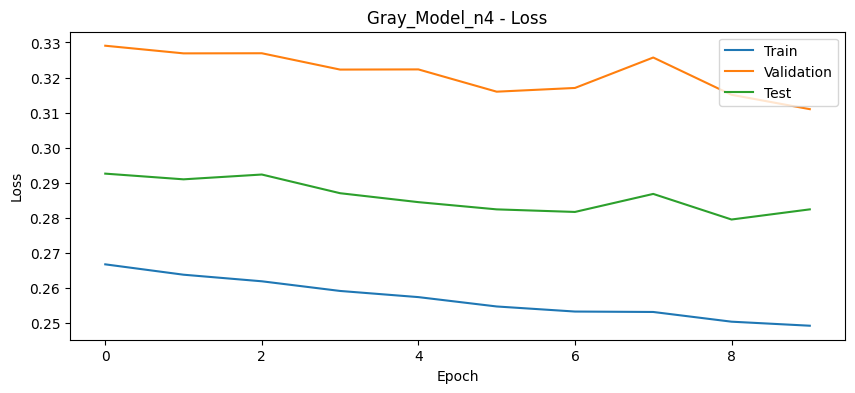

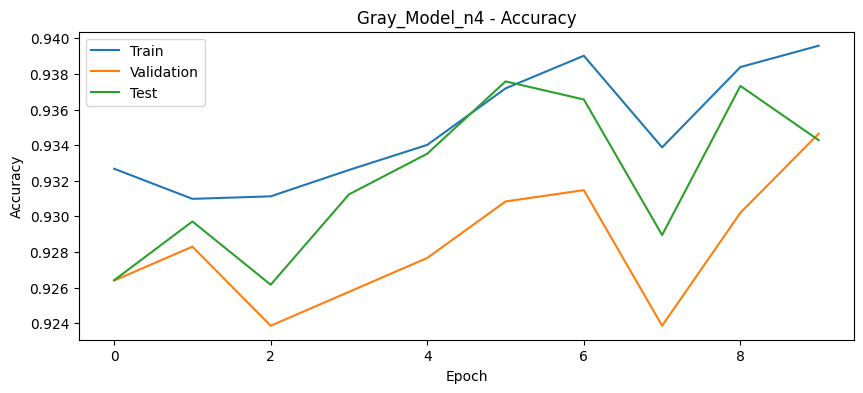

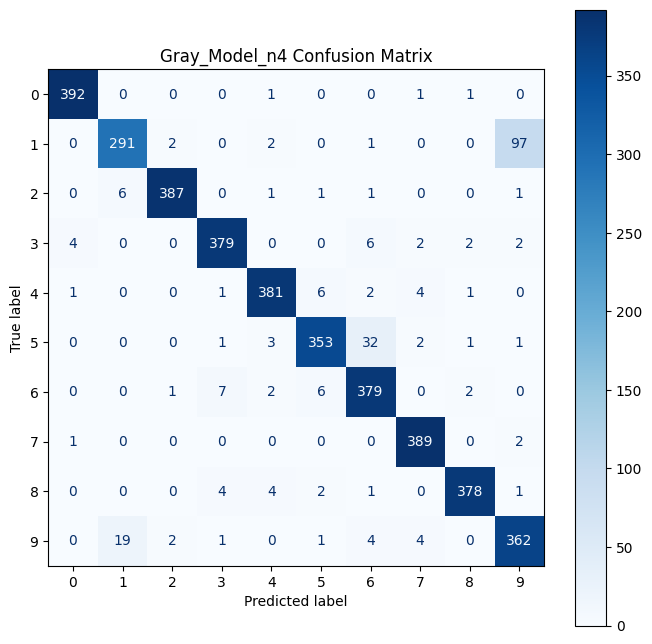


==================== Training Binary_Model_n4 ====================


Epoch 1 — Train Loss: 1.1740 | Val Acc: 77.92% | Test Acc: 78.33%


Epoch 2 — Train Loss: 0.7328 | Val Acc: 80.96% | Test Acc: 82.21%


Epoch 3 — Train Loss: 0.6579 | Val Acc: 82.55% | Test Acc: 83.35%


Epoch 4 — Train Loss: 0.6222 | Val Acc: 82.23% | Test Acc: 83.43%


Epoch 5 — Train Loss: 0.6009 | Val Acc: 83.38% | Test Acc: 83.74%


Epoch 6 — Train Loss: 0.5892 | Val Acc: 83.57% | Test Acc: 83.99%


Epoch 7 — Train Loss: 0.5795 | Val Acc: 83.57% | Test Acc: 84.37%


Epoch 8 — Train Loss: 0.5711 | Val Acc: 84.52% | Test Acc: 84.42%


Epoch 9 — Train Loss: 0.5649 | Val Acc: 83.88% | Test Acc: 84.52%


Epoch 10 — Train Loss: 0.5600 | Val Acc: 83.76% | Test Acc: 84.67%
Running final evaluation for visualization...


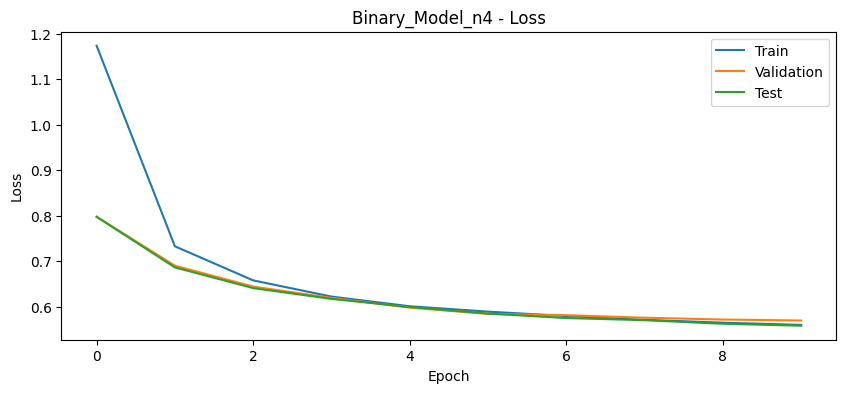

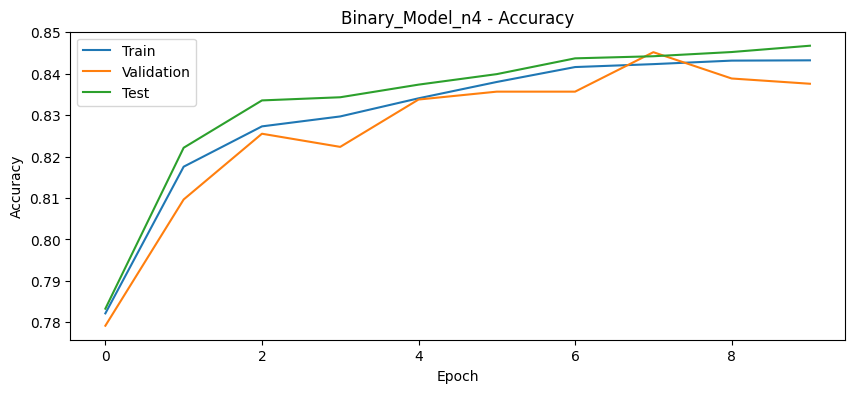

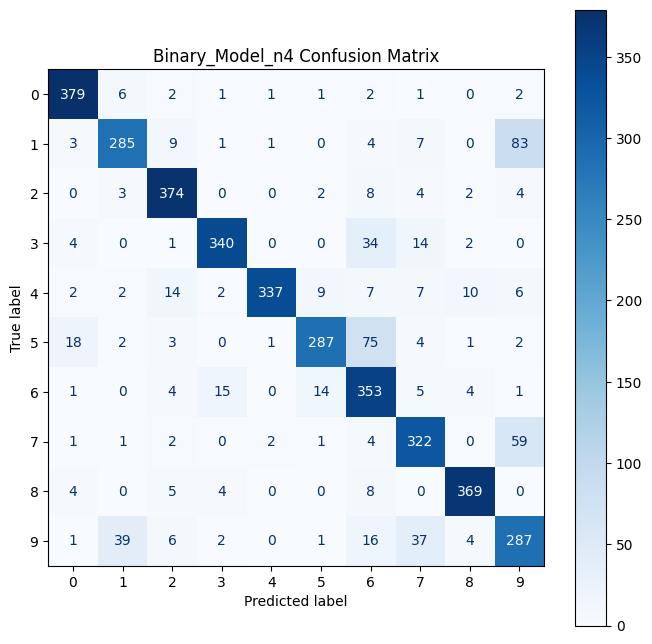


🚀 STARTING EXPERIMENT BLOCK: n=8 Features

==================== Training Gray_Model_n8 ====================


Epoch 1 — Train Loss: 0.8135 | Val Acc: 89.59% | Test Acc: 90.31%


Epoch 2 — Train Loss: 0.3298 | Val Acc: 92.01% | Test Acc: 92.41%


Epoch 3 — Train Loss: 0.3056 | Val Acc: 93.21% | Test Acc: 94.04%


Epoch 4 — Train Loss: 0.2968 | Val Acc: 93.46% | Test Acc: 94.04%


Epoch 5 — Train Loss: 0.2904 | Val Acc: 93.02% | Test Acc: 93.78%


Epoch 6 — Train Loss: 0.2841 | Val Acc: 92.89% | Test Acc: 93.63%


Epoch 7 — Train Loss: 0.2803 | Val Acc: 93.65% | Test Acc: 94.09%


Epoch 8 — Train Loss: 0.2766 | Val Acc: 93.65% | Test Acc: 94.24%


Epoch 9 — Train Loss: 0.2738 | Val Acc: 93.59% | Test Acc: 93.99%


Epoch 10 — Train Loss: 0.2708 | Val Acc: 93.34% | Test Acc: 94.06%
Running final evaluation for visualization...


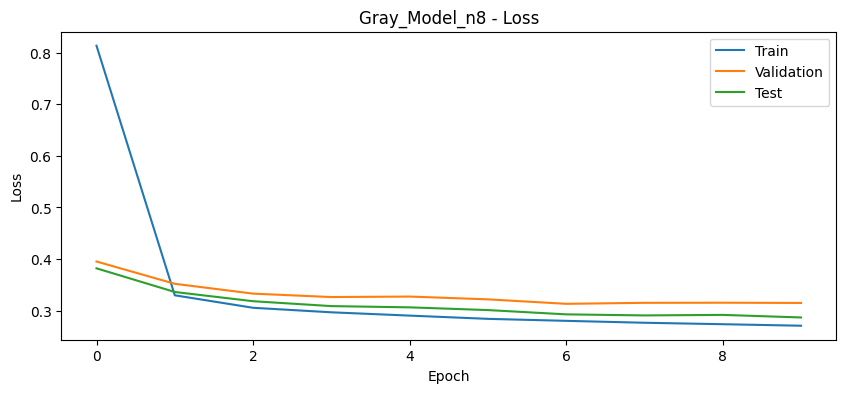

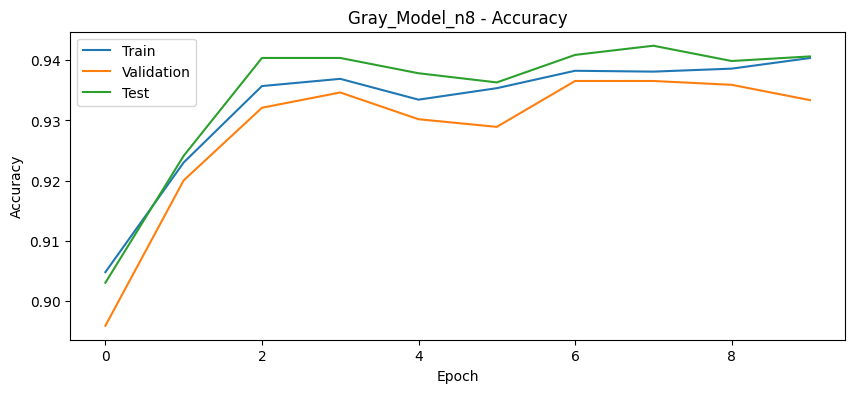

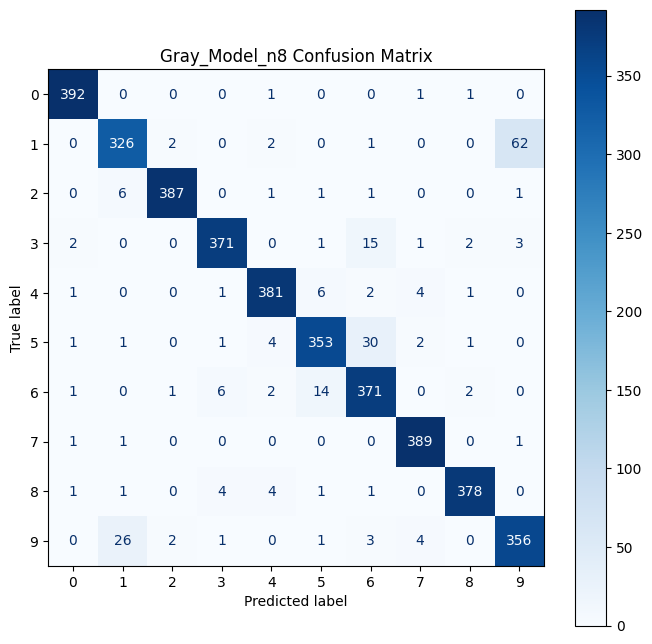


==================== Training Binary_Model_n8 ====================


Epoch 1 — Train Loss: 1.2125 | Val Acc: 79.82% | Test Acc: 80.97%


Epoch 2 — Train Loss: 0.6843 | Val Acc: 83.50% | Test Acc: 84.65%


Epoch 3 — Train Loss: 0.5975 | Val Acc: 85.03% | Test Acc: 85.92%


Binary_Model_n8 Epoch 4/10:  89%|████████▉ | 396/444 [1:02:48<07:54,  9.89s/it]

In [ ]:
# ==========================================
# Main Execution Loop
# ==========================================
components_list = [4, 8]  # We processed 4 and 8 features

print("Starting training for all configurations...\n")

for n in components_list:
    print(f"\n🚀 STARTING EXPERIMENT BLOCK: n={n} Features")
    
    # -------------------- 1. Grayscale Model --------------------
    train_and_evaluate(
        model=models_gray[n],
        X_train_t=X_train_gray_t_dict[n],
        y_train_t=y_train_gray_t_dict[n],
        X_test_t=X_test_gray_t_dict[n],
        y_test_np=y_test_gray_np_dict[n],
        model_name=f"Gray_Model_n{n}",
        epochs=10,       # Adjusted for better convergence
        batch_size=32,
        lr=0.005         # Slightly lower LR often helps hybrid models stabilize
    )

    # -------------------- 2. Binary Model --------------------
    train_and_evaluate(
        model=models_binary[n],
        X_train_t=X_train_binary_t_dict[n],
        y_train_t=y_train_binary_t_dict[n],
        X_test_t=X_test_binary_t_dict[n],
        y_test_np=y_test_binary_np_dict[n],
        model_name=f"Binary_Model_n{n}",
        epochs=10,
        batch_size=32,
        lr=0.005
    )

print("\n✅ All training sessions completed.")

Starting training for all configurations...


🚀 STARTING EXPERIMENT BLOCK: n=4 Features

==================== Training Gray_Model_n4 ====================
Resuming Gray_Model_n4 from epoch 11
Running final evaluation for visualization...


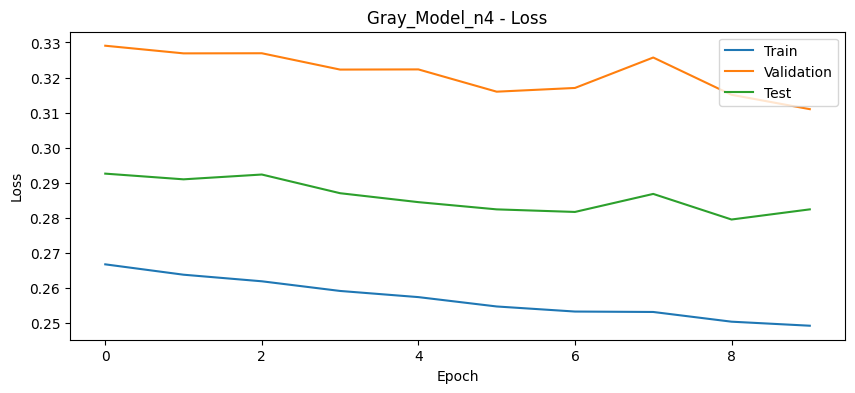

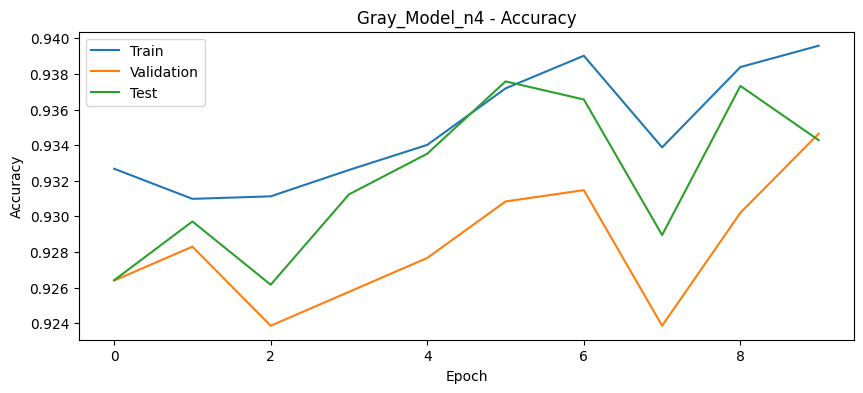

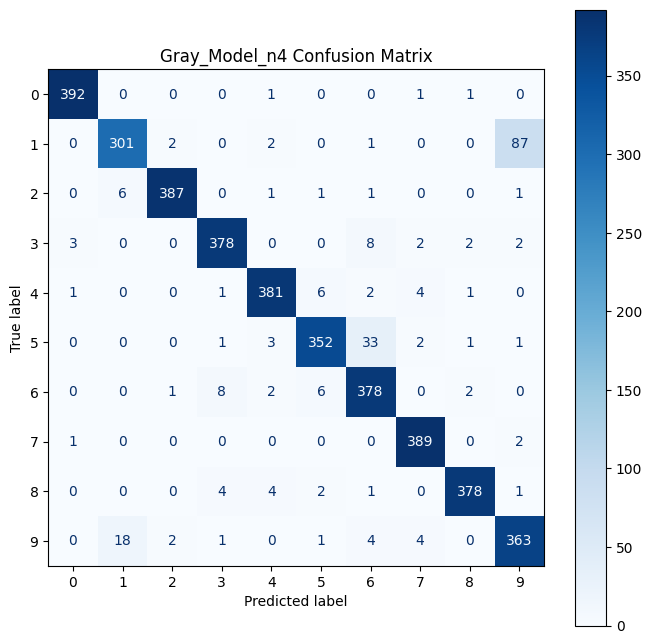


==================== Training Binary_Model_n4 ====================
Resuming Binary_Model_n4 from epoch 11
Running final evaluation for visualization...


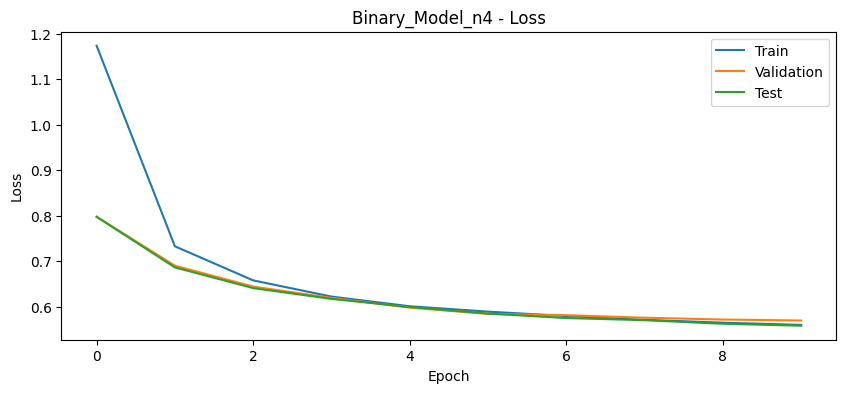

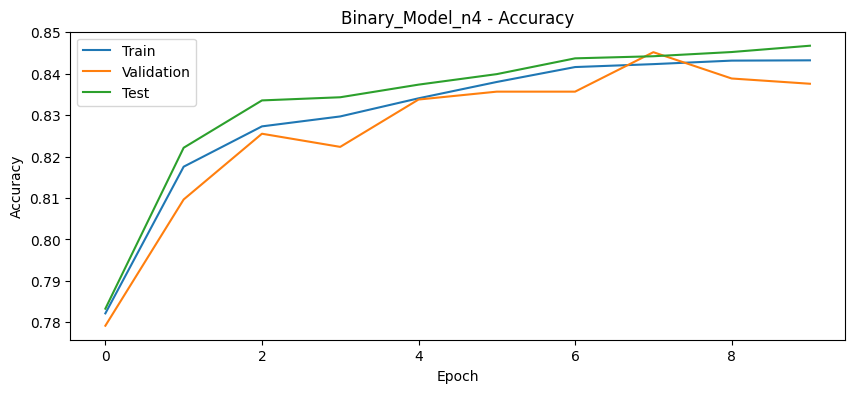

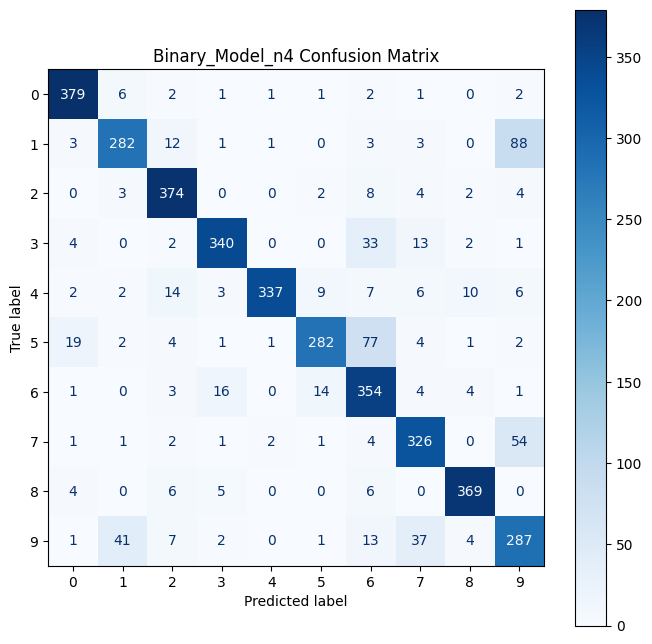


🚀 STARTING EXPERIMENT BLOCK: n=8 Features

==================== Training Gray_Model_n8 ====================
Resuming Gray_Model_n8 from epoch 11
Running final evaluation for visualization...


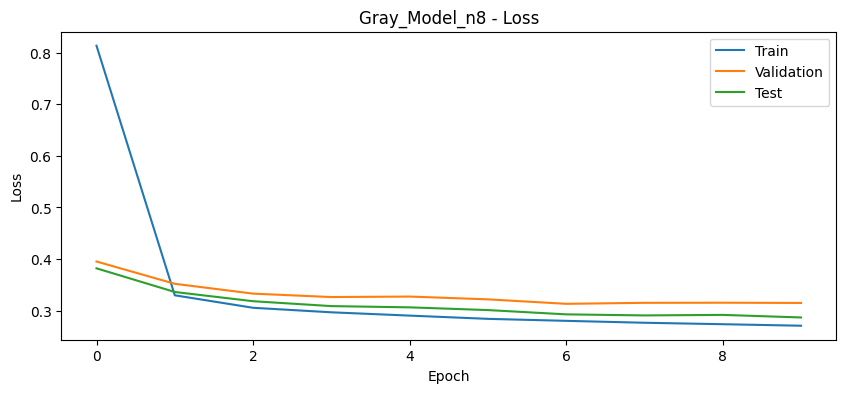

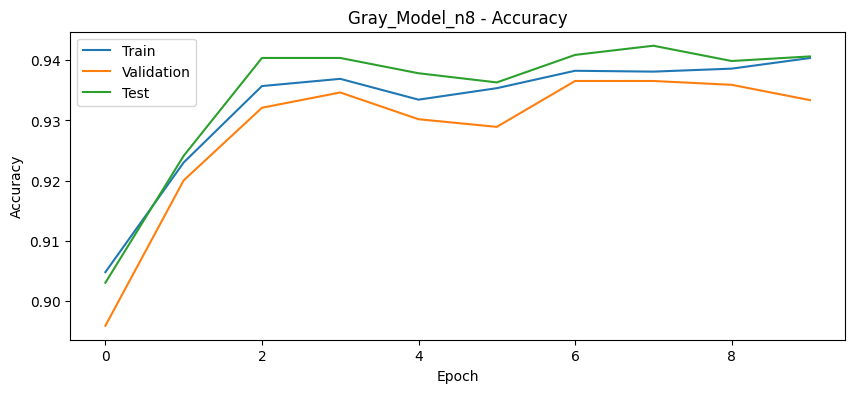

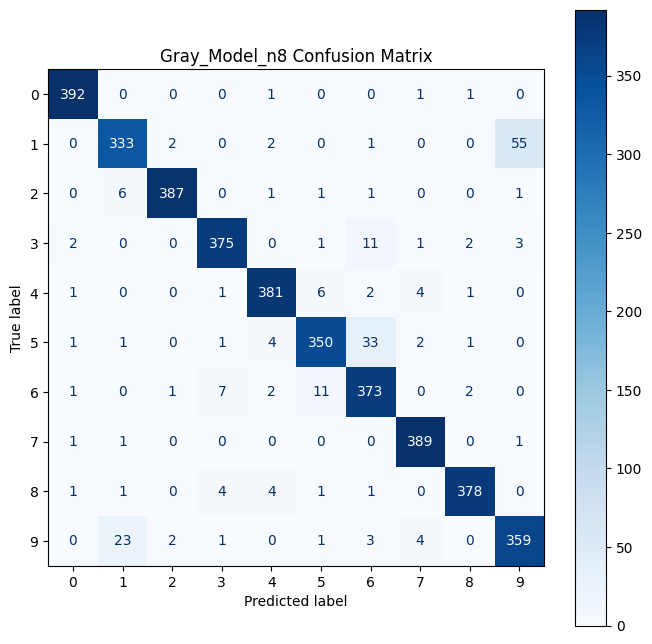


==================== Training Binary_Model_n8 ====================
Resuming Binary_Model_n8 from epoch 4


Epoch 4 — Train Loss: 0.5603 | Val Acc: 86.74% | Test Acc: 86.75%


Epoch 5 — Train Loss: 0.5407 | Val Acc: 86.48% | Test Acc: 86.88%


Epoch 6 — Train Loss: 0.5261 | Val Acc: 86.80% | Test Acc: 87.36%


Epoch 7 — Train Loss: 0.5144 | Val Acc: 86.55% | Test Acc: 87.49%


Epoch 8 — Train Loss: 0.5034 | Val Acc: 86.99% | Test Acc: 87.85%


Epoch 9 — Train Loss: 0.4985 | Val Acc: 86.93% | Test Acc: 87.62%


Epoch 10 — Train Loss: 0.4887 | Val Acc: 87.18% | Test Acc: 87.62%
Running final evaluation for visualization...


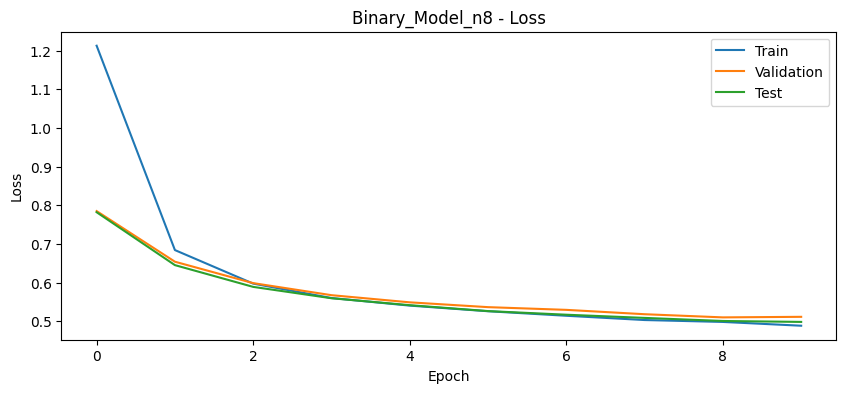

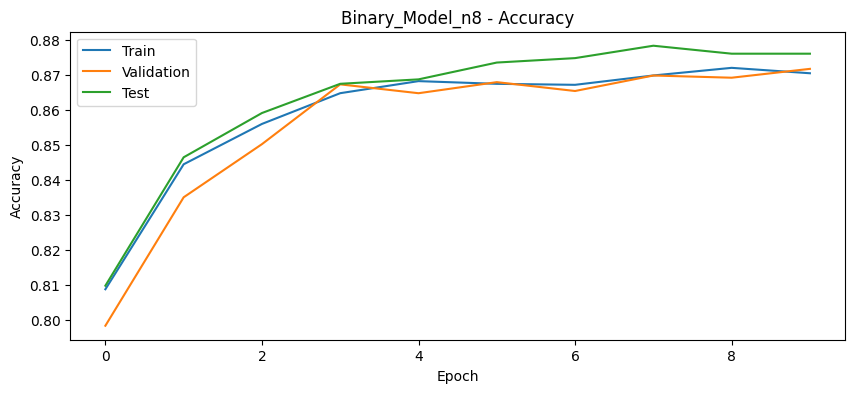

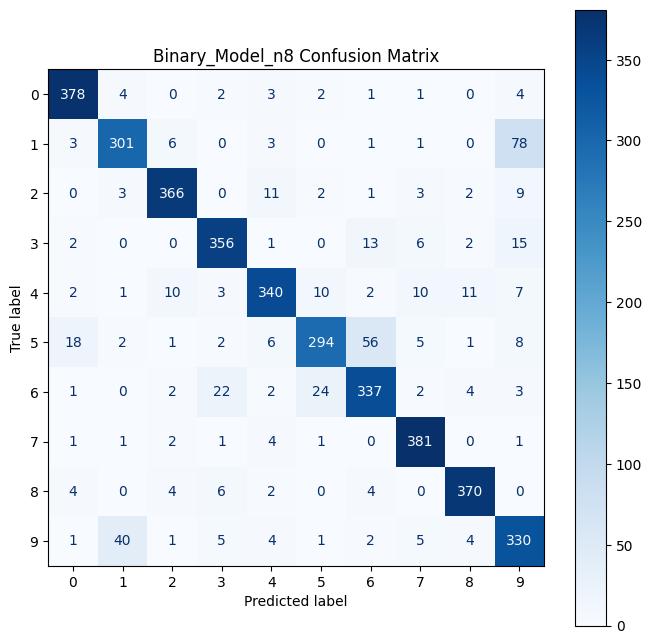


✅ All training sessions completed.


In [9]:
# ==========================================
# Main Execution Loop
# ==========================================
components_list = [4, 8]  # We processed 4 and 8 features

print("Starting training for all configurations...\n")

for n in components_list:
    print(f"\n🚀 STARTING EXPERIMENT BLOCK: n={n} Features")
    
    # -------------------- 1. Grayscale Model --------------------
    train_and_evaluate(
        model=models_gray[n],
        X_train_t=X_train_gray_t_dict[n],
        y_train_t=y_train_gray_t_dict[n],
        X_test_t=X_test_gray_t_dict[n],
        y_test_np=y_test_gray_np_dict[n],
        model_name=f"Gray_Model_n{n}",
        epochs=10,       # Adjusted for better convergence
        batch_size=32,
        lr=0.005         # Slightly lower LR often helps hybrid models stabilize
    )

    # -------------------- 2. Binary Model --------------------
    train_and_evaluate(
        model=models_binary[n],
        X_train_t=X_train_binary_t_dict[n],
        y_train_t=y_train_binary_t_dict[n],
        X_test_t=X_test_binary_t_dict[n],
        y_test_np=y_test_binary_np_dict[n],
        model_name=f"Binary_Model_n{n}",
        epochs=10,
        batch_size=32,
        lr=0.005
    )

print("\n✅ All training sessions completed.")

# supervised

In [2]:
import numpy as np
import os

# Define the folder path
features_folder = "./../../features/training-a/umap"

print(f"📂 Loading processed features from: {features_folder}\n")

# ==========================================
# 1. Load Grayscale Data (Train & Test)
# ==========================================
print("--- Loading Grayscale Data ---")
try:
    # Load Labels
    y_train_gray = np.load(os.path.join(features_folder, "y_train_gray.npy"))
    y_test_gray  = np.load(os.path.join(features_folder, "y_test_gray.npy"))

    # Load 4-Dimension Features
    X_train_gray_4 = np.load(os.path.join(features_folder, "X_train_gray_umap_4.npy"))
    X_test_gray_4  = np.load(os.path.join(features_folder, "X_test_gray_umap_4.npy"))

    # Load 8-Dimension Features
    X_train_gray_8 = np.load(os.path.join(features_folder, "X_train_gray_umap_8.npy"))
    X_test_gray_8  = np.load(os.path.join(features_folder, "X_test_gray_umap_8.npy"))

    print("✅ Grayscale Loaded Successfully")
    print(f"   > Train Labels: {y_train_gray.shape} | Test Labels: {y_test_gray.shape}")
    print(f"   > Train (4D):   {X_train_gray_4.shape} | Test (4D): {X_test_gray_4.shape}")
    print(f"   > Train (8D):   {X_train_gray_8.shape} | Test (8D): {X_test_gray_8.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading Grayscale data: {e}")


# ==========================================
# 2. Load Binary Data (Train & Test)
# ==========================================
print("\n--- Loading Binary Data ---")
try:
    # Load Labels
    y_train_binary = np.load(os.path.join(features_folder, "y_train_binary.npy"))
    y_test_binary  = np.load(os.path.join(features_folder, "y_test_binary.npy"))

    # Load 4-Dimension Features
    X_train_binary_4 = np.load(os.path.join(features_folder, "X_train_binary_umap_4.npy"))
    X_test_binary_4  = np.load(os.path.join(features_folder, "X_test_binary_umap_4.npy"))

    # Load 8-Dimension Features
    X_train_binary_8 = np.load(os.path.join(features_folder, "X_train_binary_umap_8.npy"))
    X_test_binary_8  = np.load(os.path.join(features_folder, "X_test_binary_umap_8.npy"))

    print("✅ Binary Loaded Successfully")
    print(f"   > Train Labels: {y_train_binary.shape} | Test Labels: {y_test_binary.shape}")
    print(f"   > Train (4D):   {X_train_binary_4.shape} | Test (4D): {X_test_binary_4.shape}")
    print(f"   > Train (8D):   {X_train_binary_8.shape} | Test (8D): {X_test_binary_8.shape}")

except FileNotFoundError as e:
    print(f"❌ Error loading Binary data: {e}")

print("\nReady for model training.")

📂 Loading processed features from: ./../../features/training-a/umap

--- Loading Grayscale Data ---
✅ Grayscale Loaded Successfully
   > Train Labels: (15761,) | Test Labels: (3941,)
   > Train (4D):   (15761, 4) | Test (4D): (3941, 4)
   > Train (8D):   (15761, 8) | Test (8D): (3941, 8)

--- Loading Binary Data ---
✅ Binary Loaded Successfully
   > Train Labels: (15761,) | Test Labels: (3941,)
   > Train (4D):   (15761, 4) | Test (4D): (3941, 4)
   > Train (8D):   (15761, 8) | Test (8D): (3941, 8)

Ready for model training.


In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Initialize the scaler
scaler = MinMaxScaler()

print("Scaling features to range [0, 1]...\n")

# ==========================================
# 1. Scale Grayscale Data (4D & 8D)
# ==========================================
# --- 4D Features ---
# Fit on Train, Transform Test
X_train_gray_4_scaled = scaler.fit_transform(X_train_gray_4)
X_test_gray_4_scaled  = scaler.transform(X_test_gray_4)

print(f"✅ Scaled Gray 4D (Train). Min: {X_train_gray_4_scaled.min():.1f}, Max: {X_train_gray_4_scaled.max():.1f}")
print(f"   Scaled Gray 4D (Test).  Min: {X_test_gray_4_scaled.min():.2f}, Max: {X_test_gray_4_scaled.max():.2f}")

# --- 8D Features ---
# Fit on Train, Transform Test
X_train_gray_8_scaled = scaler.fit_transform(X_train_gray_8)
X_test_gray_8_scaled  = scaler.transform(X_test_gray_8)

print(f"✅ Scaled Gray 8D (Train). Min: {X_train_gray_8_scaled.min():.1f}, Max: {X_train_gray_8_scaled.max():.1f}")


# ==========================================
# 2. Scale Binary Data (4D & 8D)
# ==========================================
# --- 4D Features ---
# Fit on Train, Transform Test
X_train_binary_4_scaled = scaler.fit_transform(X_train_binary_4)
X_test_binary_4_scaled  = scaler.transform(X_test_binary_4)

print(f"✅ Scaled Binary 4D (Train). Min: {X_train_binary_4_scaled.min():.1f}, Max: {X_train_binary_4_scaled.max():.1f}")

# --- 8D Features ---
# Fit on Train, Transform Test
X_train_binary_8_scaled = scaler.fit_transform(X_train_binary_8)
X_test_binary_8_scaled  = scaler.transform(X_test_binary_8)

print(f"✅ Scaled Binary 8D (Train). Min: {X_train_binary_8_scaled.min():.1f}, Max: {X_train_binary_8_scaled.max():.1f}")

print("\nReady for model input.")

Scaling features to range [0, 1]...

✅ Scaled Gray 4D (Train). Min: 0.0, Max: 1.0
   Scaled Gray 4D (Test).  Min: -0.00, Max: 1.00
✅ Scaled Gray 8D (Train). Min: 0.0, Max: 1.0
✅ Scaled Binary 4D (Train). Min: 0.0, Max: 1.0
✅ Scaled Binary 8D (Train). Min: 0.0, Max: 1.0

Ready for model input.


In [4]:
import torch
import numpy as np

print("Converting data to PyTorch tensors...\n")

# ==========================================
# 1. Grayscale Data (4D & 8D)
# ==========================================
# --- Gray 4D ---
# Use the SCALED data for X, and the original label arrays for y
X_train_g4_t = torch.tensor(X_train_gray_4_scaled, dtype=torch.float32)
y_train_g4_t = torch.tensor(y_train_gray, dtype=torch.long)
X_test_g4_t  = torch.tensor(X_test_gray_4_scaled, dtype=torch.float32)
y_test_g4_np = y_test_gray  # Keep as numpy for evaluation metric calculation

# --- Gray 8D ---
X_train_g8_t = torch.tensor(X_train_gray_8_scaled, dtype=torch.float32)
# Note: y_train_gray is the same for 4D and 8D, but we create a new tensor ref for clarity
y_train_g8_t = torch.tensor(y_train_gray, dtype=torch.long) 
X_test_g8_t  = torch.tensor(X_test_gray_8_scaled, dtype=torch.float32)
y_test_g8_np = y_test_gray

# ==========================================
# 2. Binary Data (4D & 8D)
# ==========================================
# --- Binary 4D ---
X_train_b4_t = torch.tensor(X_train_binary_4_scaled, dtype=torch.float32)
y_train_b4_t = torch.tensor(y_train_binary, dtype=torch.long)
X_test_b4_t  = torch.tensor(X_test_binary_4_scaled, dtype=torch.float32)
y_test_b4_np = y_test_binary

# --- Binary 8D ---
X_train_b8_t = torch.tensor(X_train_binary_8_scaled, dtype=torch.float32)
y_train_b8_t = torch.tensor(y_train_binary, dtype=torch.long)
X_test_b8_t  = torch.tensor(X_test_binary_8_scaled, dtype=torch.float32)
y_test_b8_np = y_test_binary

# ==========================================
# 3. Validation
# ==========================================
print(f"✅ Gray 4D Tensor:   {X_train_g4_t.shape}, dtype={X_train_g4_t.dtype}")
print(f"✅ Gray 8D Tensor:   {X_train_g8_t.shape}, dtype={X_train_g8_t.dtype}")
print(f"✅ Binary 4D Tensor: {X_train_b4_t.shape}, dtype={X_train_b4_t.dtype}")
print(f"✅ Binary 8D Tensor: {X_train_b8_t.shape}, dtype={X_train_b8_t.dtype}")

print("\nReady for Neural Network training.")

Converting data to PyTorch tensors...

✅ Gray 4D Tensor:   torch.Size([15761, 4]), dtype=torch.float32
✅ Gray 8D Tensor:   torch.Size([15761, 8]), dtype=torch.float32
✅ Binary 4D Tensor: torch.Size([15761, 4]), dtype=torch.float32
✅ Binary 8D Tensor: torch.Size([15761, 8]), dtype=torch.float32

Ready for Neural Network training.


In [5]:
import torch
import torch.nn as nn
from quantum_layer import QuantumLayer  # Ensure quantum_layer.py is in the same folder

# ==========================================
# 0. Configuration
# ==========================================
NUM_CLASSES = 10   # Change to len(np.unique(y_train_gray)) if different
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu")

print(f"🚀 Initializing Models on device: {device}")

# ==========================================
# 1. Initialize Model Dictionaries
# ==========================================
models_gray = {}
models_binary = {}

# We are building models for 4 and 8 dimensions (matching your UMAP data)
components_list = [4, 8] 

print("\n--- Building Hybrid Architectures ---")

for n in components_list:
    # -------------------- Grayscale Models --------------------
    # Architecture: Quantum Layer (n) -> Linear (16) -> ReLU -> Linear (10)
    models_gray[n] = nn.Sequential(
        QuantumLayer(n_qubits=n), 
        nn.Linear(n, 16),         
        nn.ReLU(),
        nn.Linear(16, NUM_CLASSES)        
    ).to(device) # Move to GPU/CPU

    # -------------------- Binary Models --------------------
    models_binary[n] = nn.Sequential(
        QuantumLayer(n_qubits=n), 
        nn.Linear(n, 16),         
        nn.ReLU(),
        nn.Linear(16, NUM_CLASSES)        
    ).to(device)

    print(f"✅ Created Gray & Binary models for n={n} inputs")

# ==========================================
# 2. Verify Structure
# ==========================================
print(f"\n[Example Inspection] Gray Model (n=4):\n{models_gray[4]}")
print(f"\n[Example Inspection] Binary Model (n=8):\n{models_binary[8]}")

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.
No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


🚀 Initializing Models on device: cpu

--- Building Hybrid Architectures ---
✅ Created Gray & Binary models for n=4 inputs
✅ Created Gray & Binary models for n=8 inputs

[Example Inspection] Gray Model (n=4):
Sequential(
  (0): QuantumLayer(
    (q_layer): TorchConnector()
  )
  (1): Linear(in_features=4, out_features=16, bias=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
)

[Example Inspection] Binary Model (n=8):
Sequential(
  (0): QuantumLayer(
    (q_layer): TorchConnector()
  )
  (1): Linear(in_features=8, out_features=16, bias=True)
  (2): ReLU()
  (3): Linear(in_features=16, out_features=10, bias=True)
)


In [6]:
# ==========================================
# Organize Tensors into Dictionaries
# ==========================================

# --- Grayscale Dictionaries ---
X_train_gray_t_dict = {
    4: X_train_g4_t, 
    8: X_train_g8_t
}

y_train_gray_t_dict = {
    4: y_train_g4_t, 
    8: y_train_g8_t
}

X_test_gray_t_dict = {
    4: X_test_g4_t,  
    8: X_test_g8_t
}

y_test_gray_np_dict = {
    4: y_test_g4_np, 
    8: y_test_g8_np
}

# --- Binary Dictionaries ---
X_train_binary_t_dict = {
    4: X_train_b4_t, 
    8: X_train_b8_t
}

y_train_binary_t_dict = {
    4: y_train_b4_t, 
    8: y_train_b8_t
}

X_test_binary_t_dict = {
    4: X_test_b4_t,  
    8: X_test_b8_t
}

y_test_binary_np_dict = {
    4: y_test_b4_np, 
    8: y_test_b8_np
}

print("✅ Data successfully organized into dictionaries.")
print(f"   > Gray Train keys:   {list(X_train_gray_t_dict.keys())}")
print(f"   > Binary Train keys: {list(X_train_binary_t_dict.keys())}")

✅ Data successfully organized into dictionaries.
   > Gray Train keys:   [4, 8]
   > Binary Train keys: [4, 8]


In [7]:
import os
import torch
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from tqdm import tqdm

# ==========================================
# 1. Reusable Training Function
# ==========================================
def train_and_evaluate(model, X_train, y_train, X_test, y_test_np, model_name, device, epochs=10, batch_size=32, lr=0.01):
    print(f"\n{'='*20} Training {model_name} {'='*20}")
    
    # Checkpoint path
    checkpoint_path = f"checkpoint_{model_name}.pth"
    
    # Initialize lists & Optimizer
    train_losses, val_losses, test_losses = [], [], []
    train_accs, val_accs, test_accs = [], [], []
    
    loss_fn = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # --- Validation Split (10%) ---
    num_samples = X_train.shape[0]
    val_size = int(0.1 * num_samples)
    
    # Move validation data to device immediately for speed
    X_val = X_train[:val_size].to(device)
    y_val = y_train[:val_size].to(device)
    
    # Keep Training data on CPU initially (moved to GPU in batches) or move all if VRAM allows
    X_train_split = X_train[val_size:]
    y_train_split = y_train[val_size:]
    
    # Move Test data to device
    X_test_dev = X_test.to(device)
    y_test_tensor = torch.tensor(y_test_np, dtype=torch.long).to(device)

    num_train_samples = X_train_split.shape[0]

    # --- Resume Logic ---
    start_epoch = 1
    if os.path.exists(checkpoint_path):
        print(f"🔄 Found checkpoint for {model_name}, loading...")
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint["model_state"])
        optimizer.load_state_dict(checkpoint["optimizer_state"])
        train_losses = checkpoint["train_losses"]
        val_losses   = checkpoint["val_losses"]
        test_losses  = checkpoint["test_losses"]
        train_accs   = checkpoint["train_accs"]
        val_accs     = checkpoint["val_accs"]
        test_accs    = checkpoint["test_accs"]
        start_epoch  = checkpoint["epoch"] + 1
        print(f"   > Resuming from epoch {start_epoch}")
    
    # -------------------- Training Loop --------------------
    for ep in range(start_epoch, epochs + 1):
        model.train()
        epoch_loss = 0

        # Shuffle indices for this epoch
        permutation = torch.randperm(num_train_samples)
        
        # Batch Loop
        for i in tqdm(range(0, num_train_samples, batch_size), desc=f"{model_name} Epoch {ep}/{epochs}", leave=False):
            indices = permutation[i:i + batch_size]
            X_batch = X_train_split[indices].to(device)
            y_batch = y_train_split[indices].to(device)

            optimizer.zero_grad()
            logits = model(X_batch)
            loss = loss_fn(logits, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

        # Avg Loss for this epoch
        avg_train_loss = epoch_loss / (num_train_samples / batch_size)
        train_losses.append(avg_train_loss)

        # -------------------- Evaluation Step --------------------
        model.eval()
        with torch.no_grad():
            # 1. Train Accuracy (using a subset to save time if huge)
            train_subset_idx = torch.randperm(num_train_samples)[:1000] # Random 1000 samples
            X_tr_sub = X_train_split[train_subset_idx].to(device)
            y_tr_sub = y_train_split[train_subset_idx].to(device)
            
            train_preds = model(X_tr_sub).argmax(dim=1).cpu().numpy()
            train_acc = accuracy_score(y_tr_sub.cpu().numpy(), train_preds)
            
            # 2. Validation Metrics
            val_logits = model(X_val)
            val_loss = loss_fn(val_logits, y_val).item()
            val_preds = val_logits.argmax(dim=1).cpu().numpy()
            val_acc = accuracy_score(y_val.cpu().numpy(), val_preds)
            
            # 3. Test Metrics
            test_logits = model(X_test_dev)
            test_loss = loss_fn(test_logits, y_test_tensor).item()
            test_preds = test_logits.argmax(dim=1).cpu().numpy()
            test_acc = accuracy_score(y_test_np, test_preds)

        train_accs.append(train_acc)
        val_losses.append(val_loss)
        val_accs.append(val_acc)
        test_losses.append(test_loss)
        test_accs.append(test_acc)

        print(f"Epoch {ep} | Train Loss: {avg_train_loss:.4f} | Val Acc: {val_acc*100:.2f}% | Test Acc: {test_acc*100:.2f}%")

        # Save Checkpoint
        torch.save({
            "epoch": ep,
            "model_state": model.state_dict(),
            "optimizer_state": optimizer.state_dict(),
            "train_losses": train_losses, "val_losses": val_losses, "test_losses": test_losses,
            "train_accs": train_accs, "val_accs": val_accs, "test_accs": test_accs
        }, checkpoint_path)

    # ==========================================
    # Final Visualization
    # ==========================================
    print("\nRunning final evaluation for visualization...")
    model.eval()
    with torch.no_grad():
        final_logits = model(X_test_dev)
        final_preds = final_logits.argmax(dim=1).cpu().numpy()

    # --- Plot Loss ---
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train')
    plt.plot(val_losses, label='Validation')
    plt.plot(test_losses, label='Test')
    plt.title(f"{model_name} - Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()

    # --- Plot Accuracy ---
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train')
    plt.plot(val_accs, label='Validation')
    plt.plot(test_accs, label='Test')
    plt.title(f"{model_name} - Accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

    # --- Confusion Matrix ---
    cm = confusion_matrix(y_test_np, final_preds)
    disp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(8, 8))
    disp.plot(cmap=plt.cm.Blues, ax=ax, values_format='d')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

    print(f"✅ {model_name} training complete.\n")

Starting training for all configurations...


🚀 STARTING EXPERIMENT BLOCK: n=4 Features

==================== Training Gray_Model_n4 ====================


Epoch 1 | Train Loss: 0.6434 | Val Acc: 98.92% | Test Acc: 94.34%


Epoch 2 | Train Loss: 0.1208 | Val Acc: 98.60% | Test Acc: 94.21%


Epoch 3 | Train Loss: 0.0924 | Val Acc: 98.98% | Test Acc: 94.39%


Epoch 4 | Train Loss: 0.0847 | Val Acc: 98.98% | Test Acc: 94.44%


Epoch 5 | Train Loss: 0.0782 | Val Acc: 98.92% | Test Acc: 94.37%


Epoch 6 | Train Loss: 0.0759 | Val Acc: 98.98% | Test Acc: 94.42%


Epoch 7 | Train Loss: 0.0732 | Val Acc: 98.98% | Test Acc: 94.42%


Epoch 8 | Train Loss: 0.0716 | Val Acc: 98.92% | Test Acc: 94.49%


Epoch 9 | Train Loss: 0.0694 | Val Acc: 98.98% | Test Acc: 94.47%


Epoch 10 | Train Loss: 0.0681 | Val Acc: 98.98% | Test Acc: 94.44%

Running final evaluation for visualization...


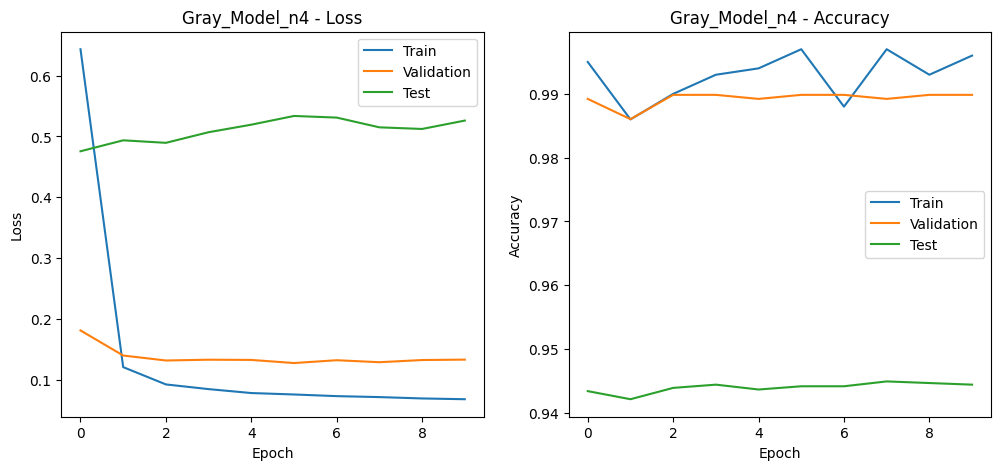

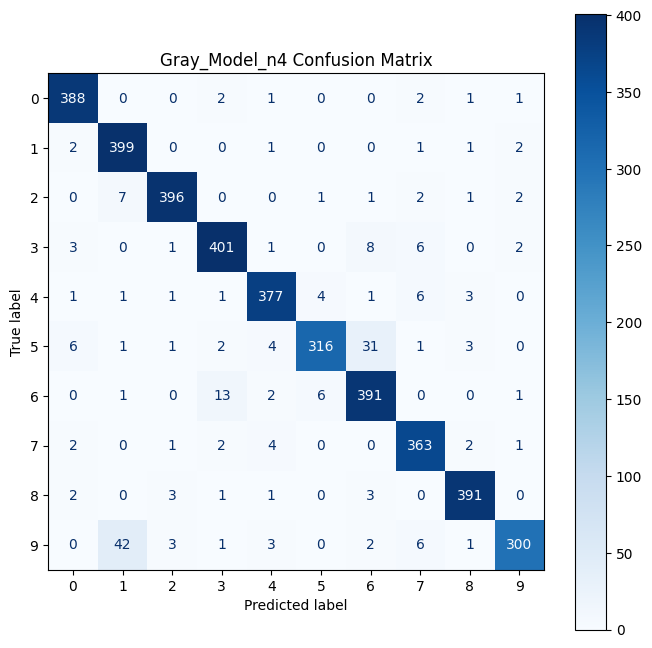

✅ Gray_Model_n4 training complete.


==================== Training Binary_Model_n4 ====================


Epoch 1 | Train Loss: 0.6706 | Val Acc: 97.21% | Test Acc: 87.69%


Epoch 2 | Train Loss: 0.1723 | Val Acc: 97.21% | Test Acc: 87.72%


Epoch 3 | Train Loss: 0.1524 | Val Acc: 97.34% | Test Acc: 87.92%


Epoch 4 | Train Loss: 0.1412 | Val Acc: 97.08% | Test Acc: 87.69%


Epoch 5 | Train Loss: 0.1361 | Val Acc: 97.40% | Test Acc: 87.90%


Epoch 6 | Train Loss: 0.1307 | Val Acc: 97.34% | Test Acc: 87.74%


Epoch 7 | Train Loss: 0.1246 | Val Acc: 97.08% | Test Acc: 88.12%


Epoch 8 | Train Loss: 0.1183 | Val Acc: 97.46% | Test Acc: 87.85%


Epoch 9 | Train Loss: 0.1139 | Val Acc: 97.53% | Test Acc: 88.00%


Epoch 10 | Train Loss: 0.1111 | Val Acc: 97.97% | Test Acc: 88.15%

Running final evaluation for visualization...


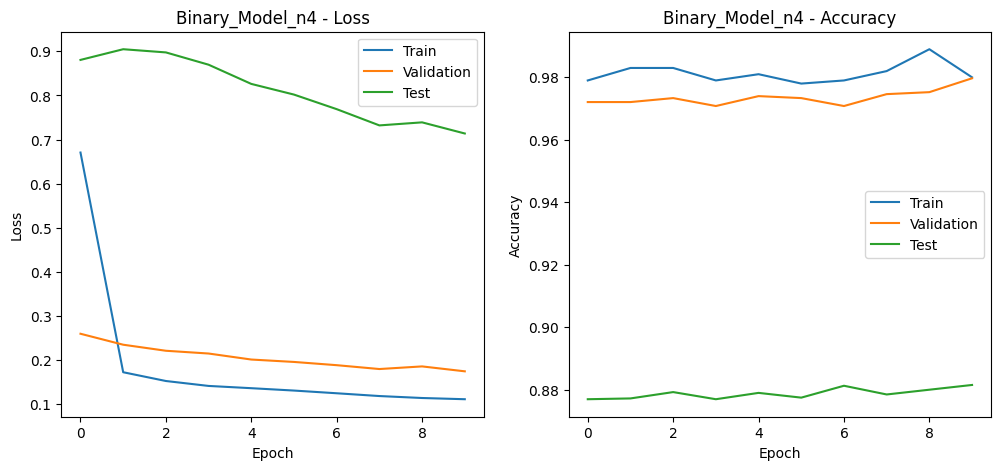

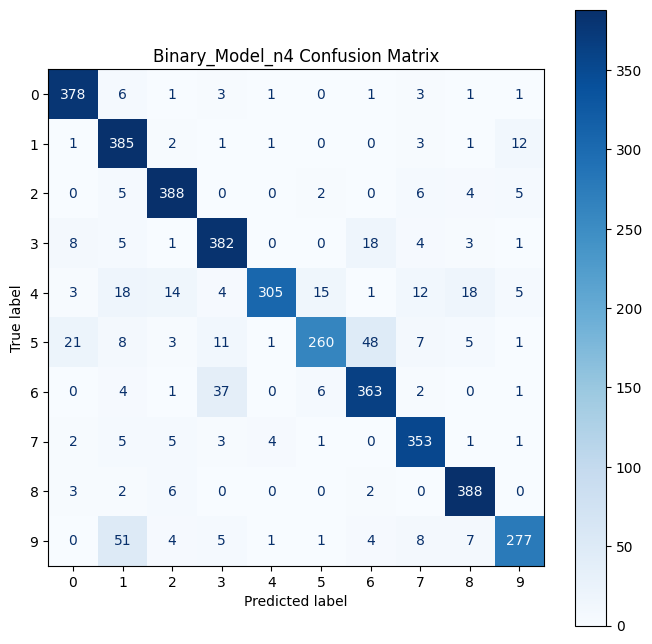

✅ Binary_Model_n4 training complete.


🚀 STARTING EXPERIMENT BLOCK: n=8 Features

==================== Training Gray_Model_n8 ====================


Epoch 1 | Train Loss: 0.5624 | Val Acc: 96.64% | Test Acc: 91.42%


Epoch 2 | Train Loss: 0.0941 | Val Acc: 98.98% | Test Acc: 94.47%


Epoch 3 | Train Loss: 0.0699 | Val Acc: 98.92% | Test Acc: 94.39%


Epoch 4 | Train Loss: 0.0647 | Val Acc: 98.92% | Test Acc: 94.37%


Epoch 5 | Train Loss: 0.0624 | Val Acc: 98.98% | Test Acc: 94.37%


Epoch 6 | Train Loss: 0.0595 | Val Acc: 98.92% | Test Acc: 94.34%


Epoch 7 | Train Loss: 0.0587 | Val Acc: 98.92% | Test Acc: 94.34%


Gray_Model_n8 Epoch 8/10:   6%|▌         | 26/444 [03:51<1:01:40,  8.85s/it]

In [ ]:
# ==========================================
# Main Execution Loop
# ==========================================
components_list = [4, 8]  # We processed 4 and 8 features

print("Starting training for all configurations...\n")

for n in components_list:
    print(f"\n🚀 STARTING EXPERIMENT BLOCK: n={n} Features")
    
    # -------------------- 1. Grayscale Model --------------------
    train_and_evaluate(
        model=models_gray[n],
        X_train=X_train_gray_t_dict[n],
        y_train=y_train_gray_t_dict[n],
        X_test=X_test_gray_t_dict[n],
        y_test_np=y_test_gray_np_dict[n],
        model_name=f"Gray_Model_n{n}",
        device=device,           # <--- Passed device here
        epochs=10,               # Adjusted for better convergence
        batch_size=32,
        lr=0.005                 # Slightly lower LR often helps hybrid models stabilize
    )

    # -------------------- 2. Binary Model --------------------
    train_and_evaluate(
        model=models_binary[n],
        X_train=X_train_binary_t_dict[n],
        y_train=y_train_binary_t_dict[n],
        X_test=X_test_binary_t_dict[n],
        y_test_np=y_test_binary_np_dict[n],
        model_name=f"Binary_Model_n{n}",
        device=device,           # <--- Passed device here
        epochs=10,
        batch_size=32,
        lr=0.005
    )

print("\n✅ All training sessions completed.")

Starting training for all configurations...


🚀 STARTING EXPERIMENT BLOCK: n=4 Features

==================== Training Gray_Model_n4 ====================
🔄 Found checkpoint for Gray_Model_n4, loading...
   > Resuming from epoch 11

Running final evaluation for visualization...


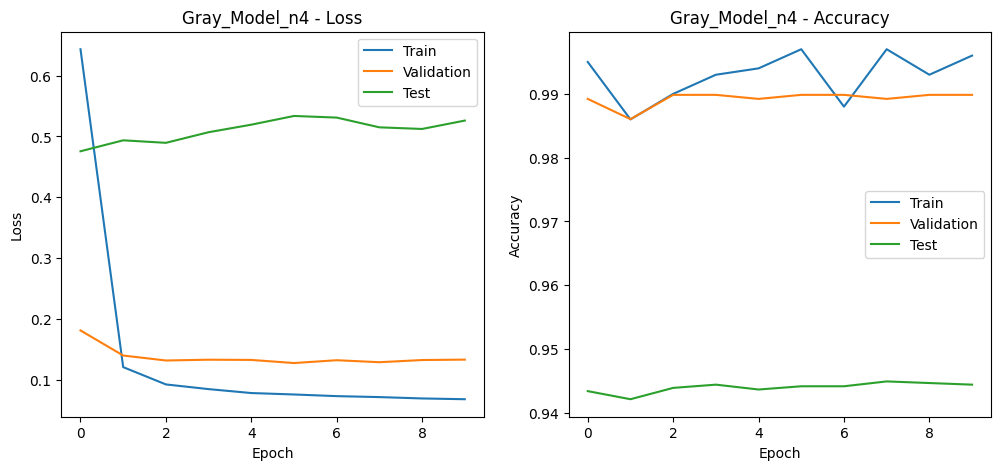

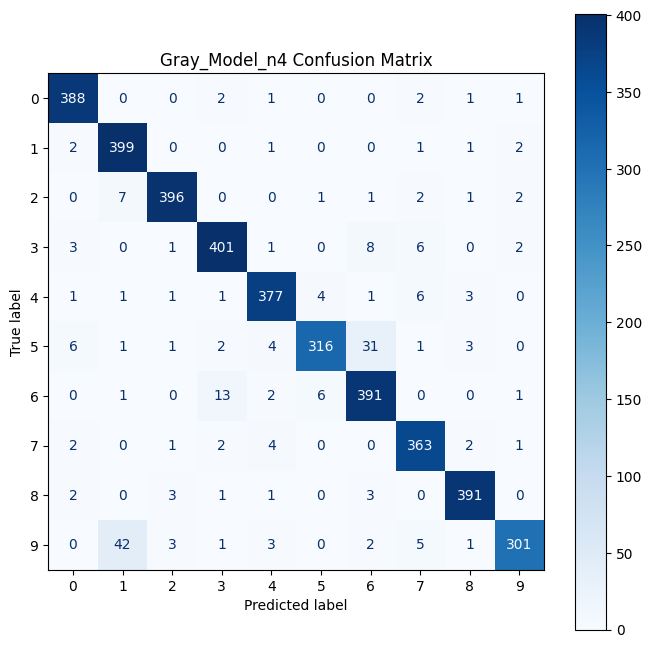

✅ Gray_Model_n4 training complete.


==================== Training Binary_Model_n4 ====================
🔄 Found checkpoint for Binary_Model_n4, loading...
   > Resuming from epoch 11

Running final evaluation for visualization...


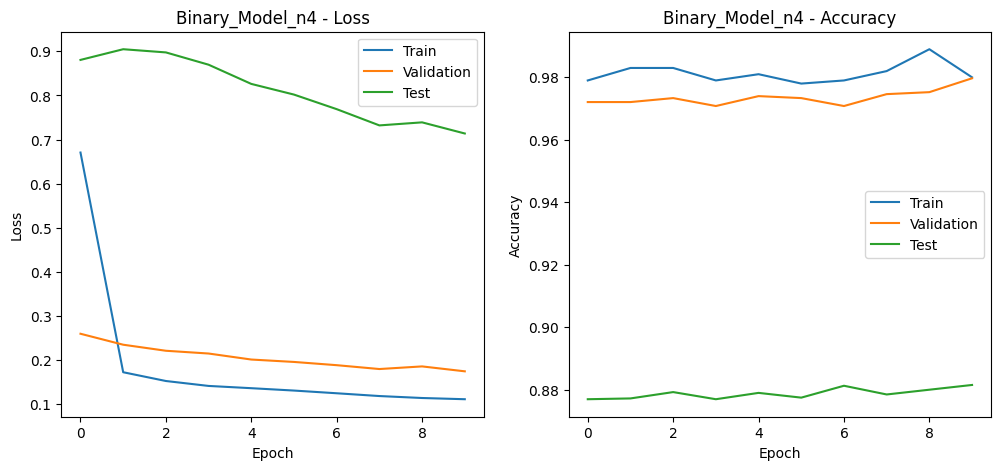

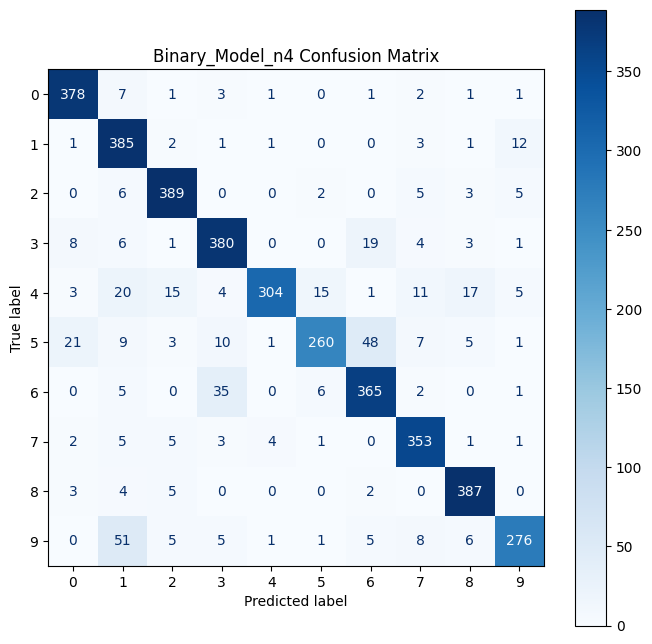

✅ Binary_Model_n4 training complete.


🚀 STARTING EXPERIMENT BLOCK: n=8 Features

==================== Training Gray_Model_n8 ====================
🔄 Found checkpoint for Gray_Model_n8, loading...
   > Resuming from epoch 8


Epoch 8 | Train Loss: 0.0572 | Val Acc: 98.92% | Test Acc: 94.29%


Epoch 9 | Train Loss: 0.0561 | Val Acc: 98.92% | Test Acc: 94.27%


Epoch 10 | Train Loss: 0.0541 | Val Acc: 98.98% | Test Acc: 94.24%

Running final evaluation for visualization...


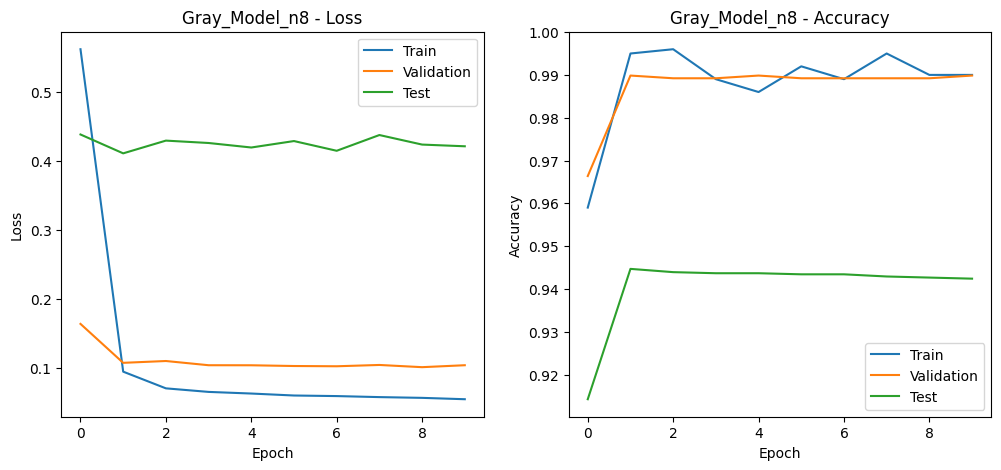

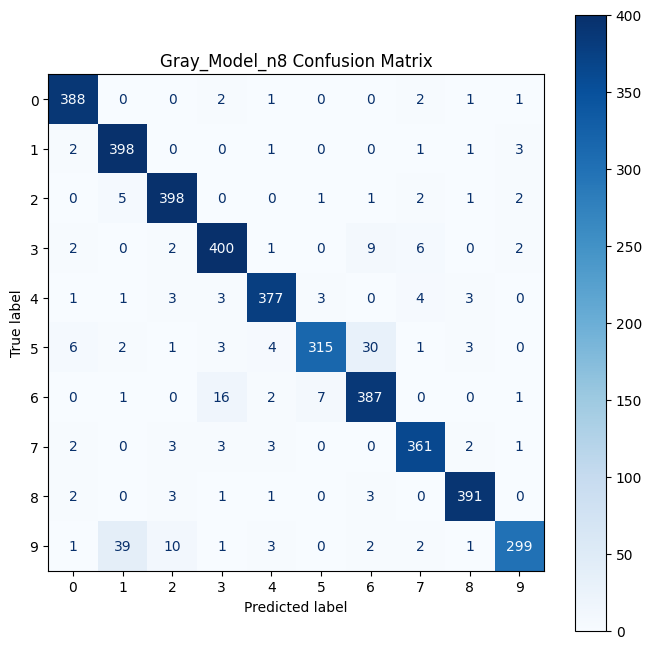

✅ Gray_Model_n8 training complete.


==================== Training Binary_Model_n8 ====================


Epoch 1 | Train Loss: 0.6123 | Val Acc: 97.78% | Test Acc: 88.71%


Epoch 2 | Train Loss: 0.1505 | Val Acc: 97.91% | Test Acc: 88.61%


Epoch 3 | Train Loss: 0.1179 | Val Acc: 97.91% | Test Acc: 88.61%


Epoch 4 | Train Loss: 0.1088 | Val Acc: 97.91% | Test Acc: 88.58%


Epoch 5 | Train Loss: 0.1042 | Val Acc: 97.91% | Test Acc: 88.56%


Epoch 6 | Train Loss: 0.1008 | Val Acc: 97.53% | Test Acc: 88.07%


Epoch 7 | Train Loss: 0.0992 | Val Acc: 97.91% | Test Acc: 88.66%


Epoch 8 | Train Loss: 0.0968 | Val Acc: 97.91% | Test Acc: 88.71%


Epoch 9 | Train Loss: 0.0949 | Val Acc: 97.91% | Test Acc: 88.58%


Epoch 10 | Train Loss: 0.0937 | Val Acc: 97.84% | Test Acc: 88.71%

Running final evaluation for visualization...


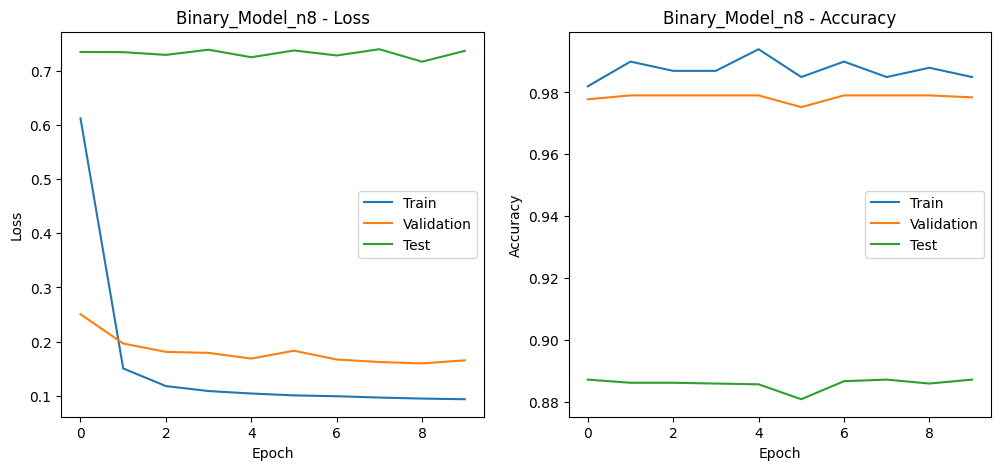

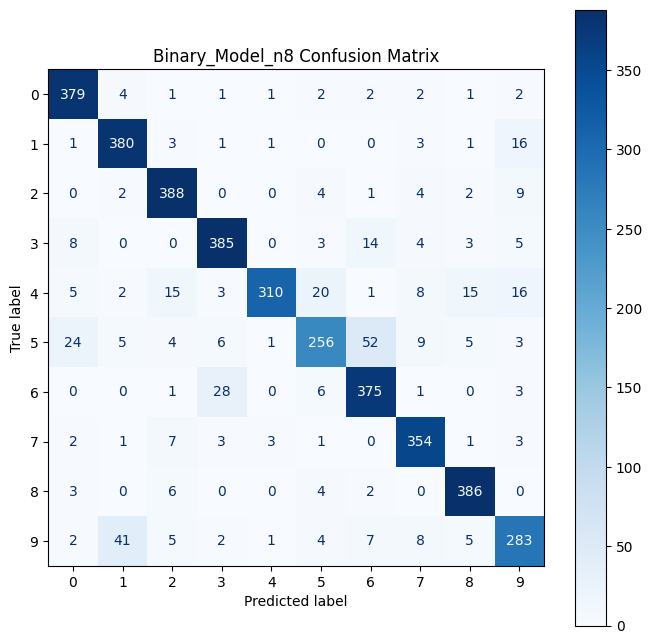

✅ Binary_Model_n8 training complete.


✅ All training sessions completed.


In [8]:
# ==========================================
# Main Execution Loop
# ==========================================
components_list = [4, 8]  # We processed 4 and 8 features

print("Starting training for all configurations...\n")

for n in components_list:
    print(f"\n🚀 STARTING EXPERIMENT BLOCK: n={n} Features")
    
    # -------------------- 1. Grayscale Model --------------------
    train_and_evaluate(
        model=models_gray[n],
        X_train=X_train_gray_t_dict[n],
        y_train=y_train_gray_t_dict[n],
        X_test=X_test_gray_t_dict[n],
        y_test_np=y_test_gray_np_dict[n],
        model_name=f"Gray_Model_n{n}",
        device=device,           # <--- Passed device here
        epochs=10,               # Adjusted for better convergence
        batch_size=32,
        lr=0.005                 # Slightly lower LR often helps hybrid models stabilize
    )

    # -------------------- 2. Binary Model --------------------
    train_and_evaluate(
        model=models_binary[n],
        X_train=X_train_binary_t_dict[n],
        y_train=y_train_binary_t_dict[n],
        X_test=X_test_binary_t_dict[n],
        y_test_np=y_test_binary_np_dict[n],
        model_name=f"Binary_Model_n{n}",
        device=device,           # <--- Passed device here
        epochs=10,
        batch_size=32,
        lr=0.005
    )

print("\n✅ All training sessions completed.")